In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [93]:
X, true_labels = make_blobs(1000,2, centers=4, random_state=14)

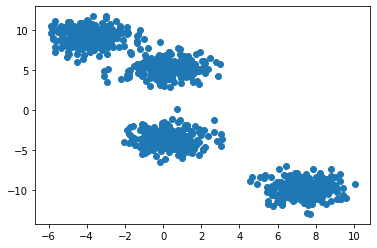

In [94]:
plt.scatter(X[:,0],X[:,1])

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
test = np.random.normal(0,0.25, size=(1000,2))

In [7]:
%%timeit
(X - test)**2

2.17 µs ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%%timeit
np.power((X-test),2)

19.3 µs ± 70.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%%timeit
np.sqrt(((X-test)**2).sum(axis=1))

9.79 µs ± 5.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%%timeit
(((X-test)**2).sum(axis=1))**0.5

9.84 µs ± 59.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
def euclidean_dis(point1, point2):
    return (((point1-point2)**2).sum(axis=1))**0.5

In [12]:
euclidean_dis(X[:1], np.zeros((1,2)))

array([0.55409196])

In [13]:
## to implement a better centeroid selection method later

In [14]:
num_of_centers = 4
centers = X[np.random.choice(X.shape[0], num_of_centers)]
centers

array([[-1.10778757e-01,  7.56766984e-01],
       [ 1.83678659e+00, -1.31349123e+00],
       [-1.19562716e+00,  9.89762285e-01],
       [-6.46631187e-04, -6.01662159e-01]])

In [47]:
distance_matrix = np.zeros((X.shape[0],num_of_centers))

In [50]:
for i,center in enumerate(centers):
    center_temp = np.repeat([center],X.shape[0], axis =0)
    distance_matrix[:,i] = euclidean_dis(X,center_temp)

In [51]:
distance_matrix

array([[0.49097094, 2.80952926, 0.99870389, 1.0551277 ],
       [2.71823983, 0.36181459, 3.62329738, 1.71347287],
       [3.08629551, 0.24982084, 4.05734779, 2.21498534],
       ...,
       [0.32126597, 2.54175969, 1.42218255, 1.22392919],
       [2.62454134, 0.47216696, 3.51418445, 1.59341022],
       [2.636959  , 0.47028088, 3.52565043, 1.60337682]])

In [61]:
clusters = np.argmin(distance_matrix, axis=1)

In [63]:
old_clusters = clusters

In [71]:
np.mean(X[np.where(clusters == 0)], axis = 0)

array([-0.18897639,  0.68415257])

In [73]:
np.array_equal(old_clusters,clusters)

True

In [77]:
np.array([[-1.10778757e-01,  7.56766984e-01],
       [ 1.83678659e+00, -1.31349123e+00],
       [-1.19562716e+00,  9.89762285e-01],
       [-6.46631187e-04, -6.01662159e-01]])

array([[-1.10778757e-01,  7.56766984e-01],
       [ 1.83678659e+00, -1.31349123e+00],
       [-1.19562716e+00,  9.89762285e-01],
       [-6.46631187e-04, -6.01662159e-01]])

In [75]:
for i in range(num_of_centers):
    centers[i] = np.mean(X[np.where(clusters == i)], axis = 0)

In [78]:
centers

array([[-0.18897639,  0.68415257],
       [ 1.52992638, -1.34051889],
       [-1.16801205,  1.17462604],
       [-0.17293794, -0.51825972]])

In [129]:
def create_distance_matrix(X, centers):
    distance_matrix = np.zeros((X.shape[0],centers.shape[0]))
    
    for i,center in enumerate(centers):
        center_temp = np.repeat([center],X.shape[0], axis =0)
        distance_matrix[:,i] = euclidean_dis(X,center_temp)
    
    return distance_matrix

In [130]:
def Kmeans(X, num_of_centers, epochs = 1500):
    
    epoch = 1
    old_clusters = None
    clusters = np.zeros(X.shape[0])
    
    # Selecting centers randomly
    centers = X[np.random.choice(X.shape[0], num_of_centers)]
    
    while((epoch<=epochs)|(np.array_equal(old_clusters,clusters))):
        # Creating a distance matrix wrt all centers and data points
        distance_matrix = create_distance_matrix(X, centers)
        
        # Assigning cluster to the center where the distance is minimum
        clusters = np.argmin(distance_matrix, axis=1)
        
        # Updating old cluster
        for i in range(num_of_centers):
            centers[i] = np.mean(X[np.where(clusters == i)], axis = 0)
        
        epoch += 1
            
    return centers, clusters


In [106]:
import seaborn as sns

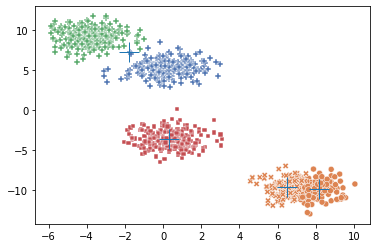

In [115]:
centers, clusters = Kmeans(X, 4)

# View results
sns.scatterplot(x=[x[0] for x in X],
                y=[y[1] for y in X],
                hue = true_labels,
                style=clusters,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in centers],
         [y for _, y in centers],
         '+',
         markersize=20
         )

plt.show()

### Becuase we selected centers randomly the clusters are not optimized

### Lets select clusters using a better method

In [311]:
def create_centers(X, num_of_centers):

    # Selecting a random center
    centers = X[np.random.choice(X.shape[0], 1)]
    
    for i in range(num_of_centers-1):
        # Calculating the sum from all the centers
        dist = create_distance_matrix(X, centers).sum(axis = 1)
        dist /= dist.sum()
        
        # Calculating the new center based on distance as probability
        new_center = X[np.random.choice(X.shape[0], size = 1, p=dist)]
        
        centers = np.concatenate((centers, new_center), axis = 0)
        
    return centers

In [312]:
X[np.argmax(dist):np.argmax(dist)+1]

array([[-5.65095719, 11.12937867]])

In [319]:
centers = create_centers(X,4)

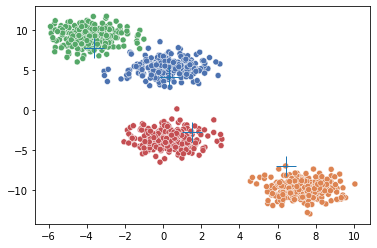

In [320]:
sns.scatterplot(x=[x[0] for x in X],
                y=[y[1] for y in X],
                hue = true_labels,
                palette="deep",
                legend=None
                )

plt.plot([x for x, _ in centers],
         [y for _, y in centers],
         '+',
         markersize=20
         )

plt.show()

In [322]:
def Kmeans(X, num_of_centers, epochs = 1500):
    
    epoch = 1
    old_clusters = None
    clusters = np.zeros(X.shape[0])
    
    # Selecting centers using kmeans++
    centers = create_centers(X,4)
    
    while((epoch<=epochs)|(np.array_equal(old_clusters,clusters))):
        # Creating a distance matrix wrt all centers and data points
        distance_matrix = create_distance_matrix(X, centers)
        
        # Assigning cluster to the center where the distance is minimum
        clusters = np.argmin(distance_matrix, axis=1)
        
        # Updating old cluster
        for i in range(num_of_centers):
            centers[i] = np.mean(X[np.where(clusters == i)], axis = 0)
        
        epoch += 1
            
    return centers, clusters

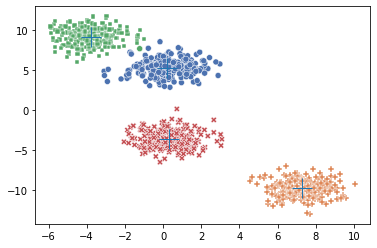

In [323]:
centers, clusters = Kmeans(X, 4)

# View results
sns.scatterplot(x=[x[0] for x in X],
                y=[y[1] for y in X],
                hue = true_labels,
                style=clusters,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in centers],
         [y for _, y in centers],
         '+',
         markersize=20
         )

plt.show()

### References used

https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670